In [2]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
voltajes= [0.016,0.018,0.020,0.022,0.024,0.026,0.028,0.030,0.035,0.040,0.045,0]
print(voltajes)

[0.016, 0.018, 0.02, 0.022, 0.024, 0.026, 0.028, 0.03, 0.035, 0.04, 0.045, 0]


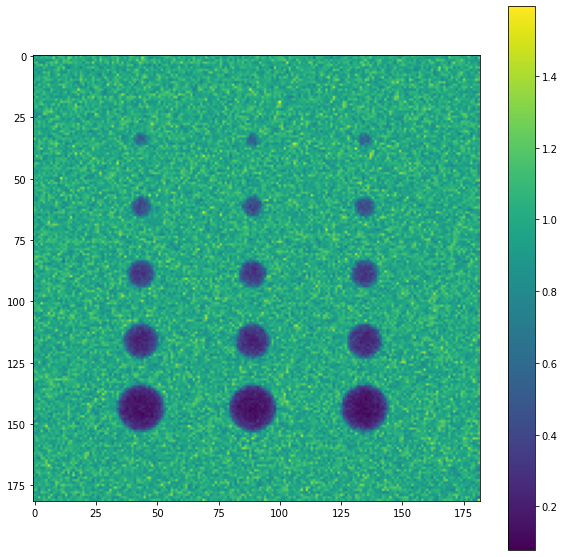

In [4]:
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile0-0-Dose.mhd', sitk.sitkFloat32))
imagen_GATE_dosis = ct_scans[0][38:220, 38:220]
ct_scansBase = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-0-Dose.mhd' , sitk.sitkFloat32))
imagen_GATE_dosisBase = ct_scansBase[0][38:220, 38:220]

imagen_GATE_dosisCorregida= imagen_GATE_dosis/imagen_GATE_dosisBase
#imagen_GATE_dosisCorregida= imagen_GATE_dosis/np.max(imagen_GATE_dosis)

fig = plt.figure(figsize=(10,10))
#plt.imshow(imagen_GATE_dosisCorregida,cmap='viridis')
plt.imshow(imagen_GATE_dosisCorregida,cmap='viridis')
plt.colorbar()

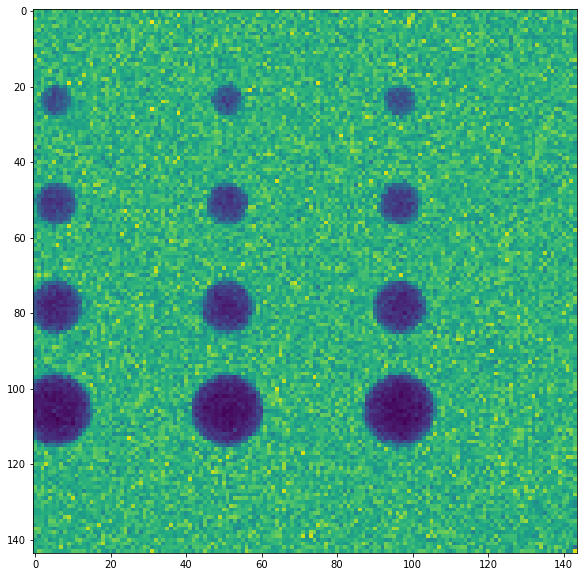

In [5]:
#Separar la parte de adentro del ciruclo
fig = plt.figure(figsize=(10,10))
plt.imshow(imagen_GATE_dosisCorregida[38:215, 38:215],cmap='viridis')

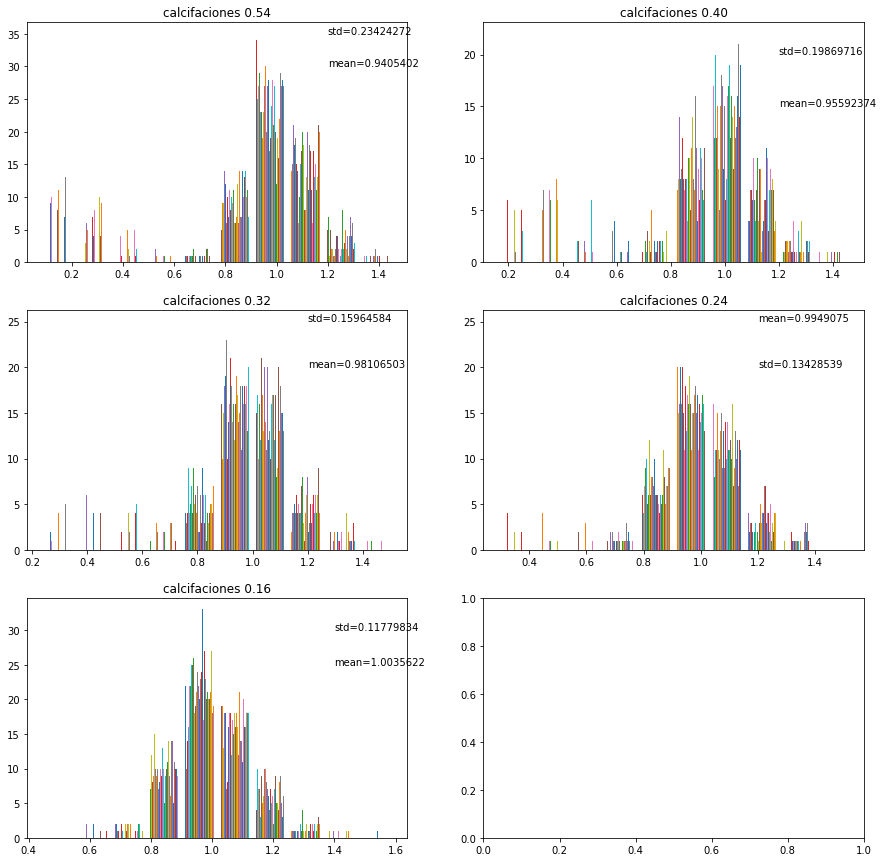

In [22]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))

axs[0,0].hist(imagen_GATE_dosisCorregida[124:179,:])
axs[0,0].text(1.2, 35, 'std=' + str(imagen_GATE_dosisCorregida[124:179,:].std()))
axs[0,0].text(1.2, 30, 'mean=' + str(imagen_GATE_dosisCorregida[124:179,:].mean()))
axs[0,0].set_title('calcifaciones 0.54')

axs[0,1].hist(imagen_GATE_dosisCorregida[97:132,:])
axs[0,1].text(1.2, 20, 'std=' + str(imagen_GATE_dosisCorregida[97:132,:].std()))
axs[0,1].text(1.2, 15, 'mean=' + str(imagen_GATE_dosisCorregida[97:132,:].mean()))
axs[0,1].set_title('calcifaciones 0.40')

axs[1,0].hist(imagen_GATE_dosisCorregida[63:107,:])
axs[1,0].text(1.2, 25, 'std=' + str(imagen_GATE_dosisCorregida[63:107,:].std()))
axs[1,0].text(1.2, 20, 'mean=' + str(imagen_GATE_dosisCorregida[63:107,:].mean()))
axs[1,0].set_title('calcifaciones 0.32')

axs[1,1].hist(imagen_GATE_dosisCorregida[37:77,:])
axs[1,1].text(1.2, 20, 'std=' + str(imagen_GATE_dosisCorregida[37:77,:].std()))
axs[1,1].text(1.2, 25, 'mean=' + str(imagen_GATE_dosisCorregida[37:77,:].mean()))
axs[1,1].set_title('calcifaciones 0.24')

axs[2,0].hist(imagen_GATE_dosisCorregida[0:55,:])
axs[2,0].text(1.4, 30, 'std=' + str(imagen_GATE_dosisCorregida[0:55,:].std()))
axs[2,0].text(1.4, 25, 'mean=' + str(imagen_GATE_dosisCorregida[0:55,:].mean()))
axs[2,0].set_title('calcifaciones 0.16')

plt.show()

# CNR =$\frac{|S_{A}-S_{B}|}{\sigma_{o}}$

where $S_{A}$ and $S_{B}$ are signal intensities for signal producing structures A and B in the region of interest and $\sigma_{o}$ is the standard deviation of the pure image noise.

In [27]:
def sacar_CNRs1(voltajes):
    CNRs=[]
    i_index= []
    j_index= []
    signal_indices=[]
    rows_roi= 54
    cols_roi= 220-38
    for k in range(len(VoltajesCorre)):
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile0-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw[0][38:220, 38:220]/ct_scans_Base[0][38:220, 38:220]
        region = ct_scan
        region_of_interest= region[0:55,:]
        
        for j in range(cols_roi):
            for i in range(rows_roi):
                    if ( region_of_interest.mean()+0.5*region_of_interest.std() > region_of_interest[i,j] > region_of_interest.mean()-0.5*region_of_interest.std()):
                        i_index.append(i)
                        j_index.append(j)
                        signal_indices.append([i,j])
                        
        signal= region_of_interest[i_index,j_index]
        arr_all=region.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_all.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs2(voltajes):
    CNRs=[]
    i_index= []
    j_index= []
    signal_indices=[]
    rows_roi= 40
    cols_roi= 220-38
    for k in range(len(VoltajesCorre)):
       
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile0-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw[0][38:220, 38:220]/ct_scans_Base[0][38:220, 38:220]
        region = ct_scan
        region_of_interest= region[37:77,:]
        
        for j in range(cols_roi):
            for i in range(rows_roi):
                    if (region_of_interest.mean()+0.5*region_of_interest.std() > region_of_interest[i,j] > region_of_interest.mean()-0.5*region_of_interest.std()):
                        i_index.append(i)
                        j_index.append(j)
                        signal_indices.append([i,j])
                        
        signal= region_of_interest[i_index,j_index]
        arr_all=region.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_all.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs3(voltajes):
    CNRs=[]
    i_index= []
    j_index= []
    signal_indices=[]
    rows_roi=40
    cols_roi= 220-38
    for k in range(len(VoltajesCorre)):
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile0-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw[0][38:220, 38:220]/ct_scans_Base[0][38:220, 38:220]
        region = ct_scan
        region_of_interest= region[63:107,:]
        
        for j in range(cols_roi):
            for i in range(rows_roi):
                    if (region_of_interest.mean()+0.5*region_of_interest.std() > region_of_interest[i,j] > region_of_interest.mean()-0.5*region_of_interest.std()):
                        i_index.append(i)
                        j_index.append(j)
                        signal_indices.append([i,j])
                        
        signal= region_of_interest[i_index,j_index]
        arr_all=region.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_all.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs4(voltajes):
    CNRs=[]
    i_index= []
    j_index= []
    signal_indices=[]
    rows_roi=35
    cols_roi= 220-38
    for k in range(len(VoltajesCorre)):
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile0-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw[0][38:220, 38:220]/ct_scans_Base[0][38:220, 38:220]
        region = ct_scan
        region_of_interest= region[97:132,:]
        
        for j in range(cols_roi):
            for i in range(rows_roi):
                    if (region_of_interest.mean()+0.5*region_of_interest.std() > region_of_interest[i,j] > region_of_interest.mean()-0.5*region_of_interest.std()):
                        i_index.append(i)
                        j_index.append(j)
                        signal_indices.append([i,j])
                        
        signal= region_of_interest[i_index,j_index]
        arr_all=region.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_all.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs5(voltajes):
    CNRs=[]
    i_index= []
    j_index= []
    signal_indices=[]
    rows_roi= 179-124
    cols_roi= 220-38
    for k in range(len(VoltajesCorre)):
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile0-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw[0][38:220, 38:220]/ct_scans_Base[0][38:220, 38:220]
        region = ct_scan
        region_of_interest= region[124:179,:]
        
        for j in range(cols_roi):
            for i in range(rows_roi):
                    if (region_of_interest.mean()+0.5*region_of_interest.std() > region_of_interest[i,j] > region_of_interest.mean()-0.5*region_of_interest.std()):
                        i_index.append(i)
                        j_index.append(j)
                        signal_indices.append([i,j])
                        
        signal= region_of_interest[i_index,j_index]
        arr_all=region.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_all.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRsG(voltajes):
    CNRs=[]
    i_index= []
    j_index= []
    signal_indices=[]
    rows_roi= 220-38
    cols_roi= 220-38
    for k in range(len(VoltajesCorre)):
        
        ct_scans_raw = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile0-%d-Dose.mhd' %k, sitk.sitkFloat32))
        ct_scans_Base = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        ct_scan= ct_scans_raw[0][38:220, 38:220]/ct_scans_Base[0][38:220, 38:220]
        region = ct_scan
        region_of_interest= region[:,:]
        
        for j in range(cols_roi):
            for i in range(rows_roi):
                    if (region_of_interest.mean()+0.5*region_of_interest.std() > region_of_interest[i,j] > region_of_interest.mean()-0.5*region_of_interest.std()):
                        i_index.append(i)
                        j_index.append(j)
                        signal_indices.append([i,j])
                        
        signal= region_of_interest[i_index,j_index]
        arr_all=region.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_all.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

In [28]:
VoltajesCorre= [16,18,20,22,24,26,28,30,35,40,45]
print(len(VoltajesCorre))
CNR1s= sacar_CNRs1(VoltajesCorre)
CNR2s= sacar_CNRs2(VoltajesCorre)
CNR3s= sacar_CNRs3(VoltajesCorre)
CNR4s= sacar_CNRs4(VoltajesCorre)
CNR5s= sacar_CNRs5(VoltajesCorre)
CNRGene= sacar_CNRsG(VoltajesCorre)

11


In [161]:
VoltajesCorre= [16,18,20,22,24,26,28,30,35,40,45]
#CNRGene= sacar_CNRsG(VoltajesCorre)
CNR1s= sacar_CNRs1(VoltajesCorre)
#CNR5s= sacar_CNRs5(VoltajesCorre)

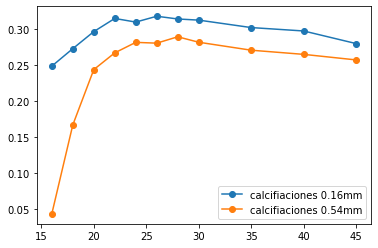

In [29]:
plt.plot(VoltajesCorre,CNR1s, 'o-', label='calcifiaciones 0.16mm')
plt.plot(VoltajesCorre,CNR5s, 'o-', label='calcifiaciones 0.54mm')
plt.legend()

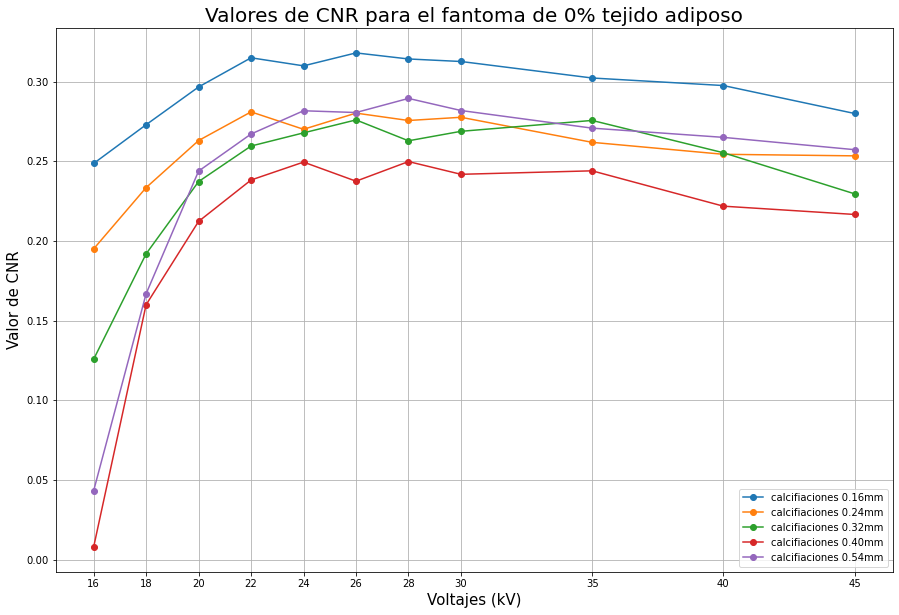

In [30]:
fig = plt.figure(figsize=(15,10))
plt.plot(VoltajesCorre,CNR1s, 'o-', label='calcifiaciones 0.16mm')
plt.plot(VoltajesCorre,CNR2s, 'o-', label='calcifiaciones 0.24mm')
plt.plot(VoltajesCorre,CNR3s, 'o-', label='calcifiaciones 0.32mm')
plt.plot(VoltajesCorre,CNR4s, 'o-', label='calcifiaciones 0.40mm')
plt.plot(VoltajesCorre,CNR5s, 'o-', label='calcifiaciones 0.54mm')
#plt.plot(VoltajesCorre,CNRGene,'*-', label='General')
plt.xlabel('Voltajes (kV)', fontsize= 15)
plt.ylabel('Valor de CNR', fontsize= 15)
plt.xticks(VoltajesCorre, VoltajesCorre )
#plt.yticks([0,3,4,5,6,7,10,11], [3,4,5,6,7,10,11])
plt.title('Valores de CNR para el fantoma de 0% tejido adiposo', fontsize= 20)
plt.grid()
plt.legend()
plt.savefig('CNRs.png')

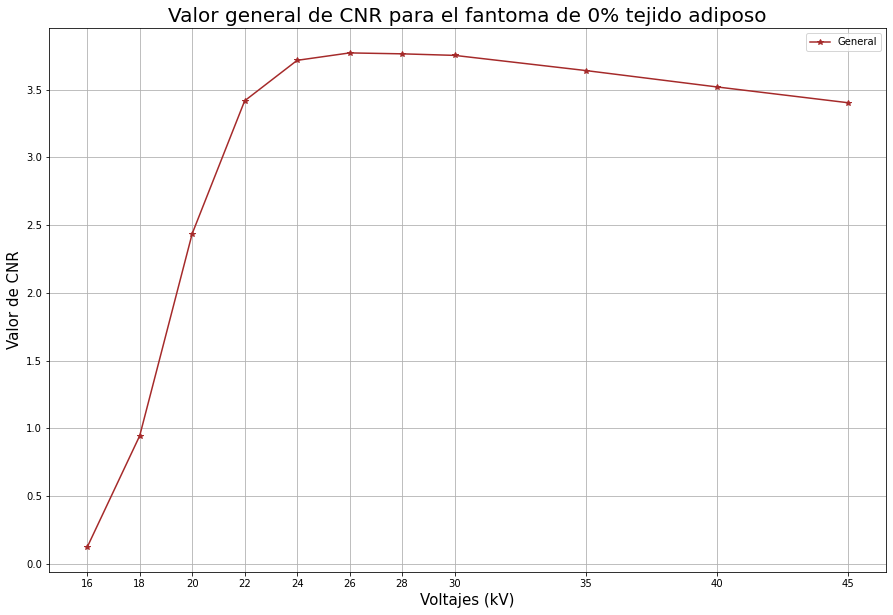

In [31]:
fig = plt.figure(figsize=(15,10))
plt.plot(VoltajesCorre,CNRGene,'*-', color='brown', label='General')
plt.xlabel('Voltajes (kV)', fontsize= 15)
plt.ylabel('Valor de CNR', fontsize= 15)
plt.xticks(VoltajesCorre, VoltajesCorre )
#plt.yticks([0,3,4,5,6,7,10,11], [3,4,5,6,7,10,11])
plt.title('Valor general de CNR para el fantoma de 0% tejido adiposo', fontsize= 20)
plt.grid()
plt.legend()
plt.savefig('CNRGeneral.png')

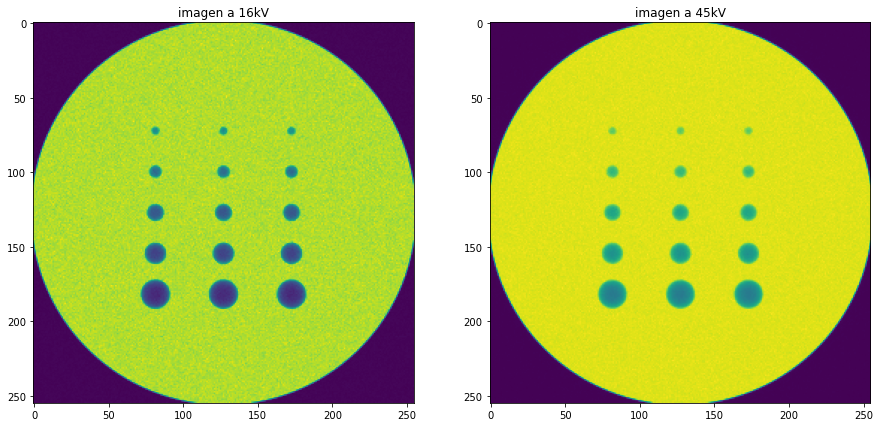

In [24]:
fig, ax = plt.subplots(1,2, figsize=(15,15))
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-0-Dose.mhd', sitk.sitkFloat32))
imagen_GATE_dosis = ct_scans[0]
ct_scans2 = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-3-Dose.mhd', sitk.sitkFloat32))
imagen_GATE_dosis2 = ct_scans2[0]

ax[0].imshow(imagen_GATE_dosis,cmap='viridis')
ax[0].title.set_text('imagen a 16kV')
ax[1].imshow(imagen_GATE_dosis2,cmap='viridis')
ax[1].title.set_text('imagen a 45kV')
plt.savefig('comparación.png')

In [169]:
print(CNRGene)

[4.2321076, 4.264314, 4.2693563, 4.270223, 4.260801, 4.2510676, 4.239103, 4.2118297, 4.105499, 3.963543, 3.8081312]


In [38]:
def sacar_CNRs1Pruebas(voltajes):
    CNRs=[]
    i_index= []
    j_index= []
    signal_indices=[]
    rows_roi= 54
    cols_roi= 220-38
    add=[]
    for k in range(len(VoltajesCorre)):
        
        ct_scan = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        region = ct_scan[0][38:220, 38:220]
        region_of_interest= region[0:55,:]
        
        for j in range(cols_roi):
            for i in range(rows_roi):
                    if (region_of_interest[i,j] < region.mean()-2*region.std()):
                        i_index.append(i)
                        j_index.append(j)
                        signal_indices.append([i,j])
                        
        signal= region_of_interest[i_index,j_index]
        arr_all=region.flatten(order='C')
        arr_signal=signal.flatten(order='C')       
        arr_bg = np.setdiff1d(arr_all, np.intersect1d(arr_all,arr_signal))       
        
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_all.std(ddof=0)
        CNRs.append(CNR)
    return CNRs, signal, signal_indices, arr_bg, arr_all


cnr,signal, indices, bg, ali= sacar_CNRs1Pruebas(VoltajesCorre)

In [39]:
print(len(indices))
#print(signal)
print(len(bg))
print(len(ali))
print(cnr)

132
31936
33124
[2.3586466, 2.2217913, 2.082896, 1.9338402, 1.8917638, 1.7821707, 1.8059608, 1.7906605, 1.5658246, 1.5620167, 1.6438787]


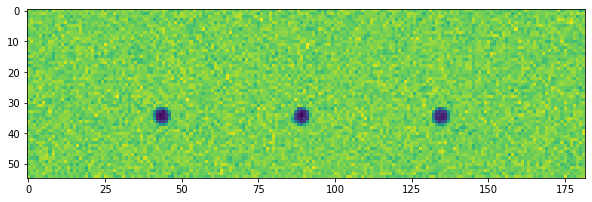

In [111]:
ct_scan = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-0-Dose.mhd', sitk.sitkFloat32))
region = ct_scan[0][38:220, 38:220]
fig = plt.figure(figsize=(10,10))
plt.imshow(region[0:55,:],cmap='viridis')

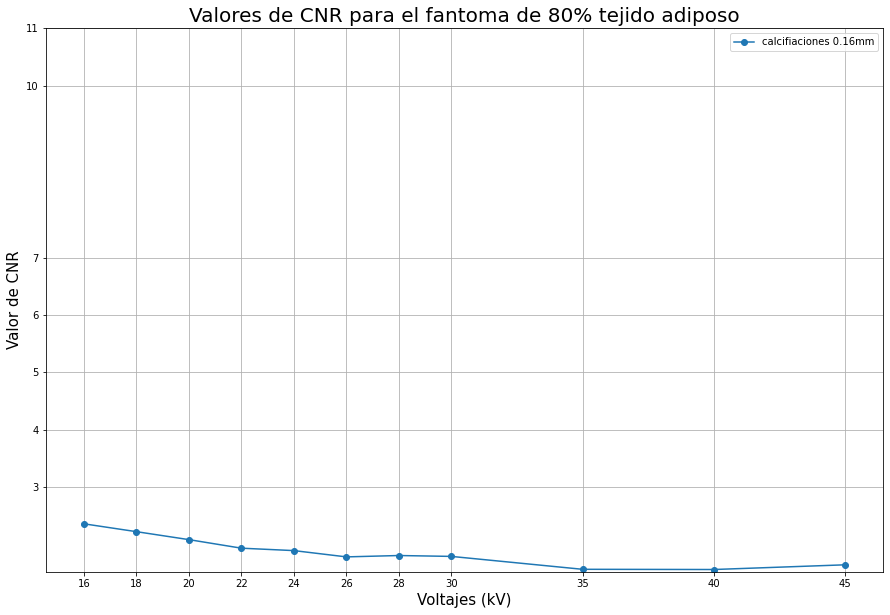

In [162]:
fig = plt.figure(figsize=(15,10))
plt.plot(VoltajesCorre,cnr, 'o-', label='calcifiaciones 0.16mm')
plt.xlabel('Voltajes (kV)', fontsize= 15)
plt.ylabel('Valor de CNR', fontsize= 15)
plt.xticks(VoltajesCorre, VoltajesCorre )
plt.yticks([3,4,5,6,7,10,11], [3,4,5,6,7,10,11])
plt.title('Valores de CNR para el fantoma de 80% tejido adiposo', fontsize= 20)
plt.grid()
plt.legend()

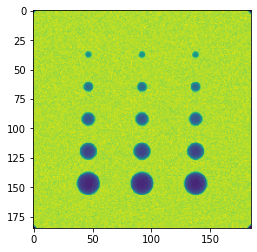

In [4]:
#Revisar los cortes
ct_scan = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-0-Dose.mhd', sitk.sitkFloat32))
region = ct_scan[0][35:220, 35:220]
plt.imshow(region,cmap='viridis')

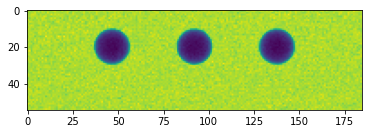

In [29]:
#Revisar los cortes
ct_scan = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-0-Dose.mhd', sitk.sitkFloat32))
region = ct_scan[0][35:220, 35:220]
plt.imshow(region[127:182,:],cmap='viridis')

(array([ 35.,   9.,   5.,   4.,   0.,   0.,   2.,   1.,  26., 103.]),
 array([1.94773438e-05, 3.26909358e-05, 4.59045259e-05, 5.91181197e-05,
        7.23317135e-05, 8.55453036e-05, 9.87588937e-05, 1.11972484e-04,
        1.25186081e-04, 1.38399671e-04, 1.51613262e-04], dtype=float32),
 <BarContainer object of 10 artists>)

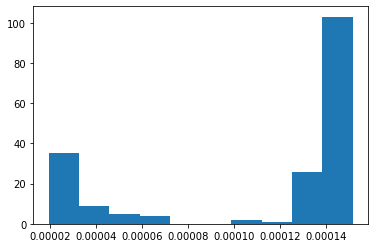

In [35]:
plt.hist(region[150,:])

(array([ 4.,  2.,  1.,  2.,  3., 10., 54., 74., 30.,  5.]),
 array([0.00010133, 0.00010688, 0.00011243, 0.00011798, 0.00012354,
        0.00012909, 0.00013464, 0.00014019, 0.00014575, 0.0001513 ,
        0.00015685], dtype=float32),
 <BarContainer object of 10 artists>)

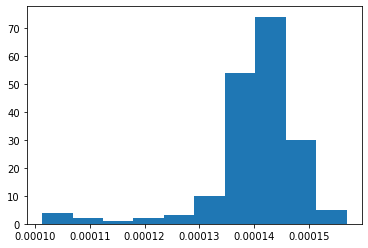

In [36]:
plt.hist(region[35,:])

(array([3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 1.100e+03, 3.083e+04]),
 array([8.1919286e-05, 7.7495270e-04, 1.4679861e-03, 2.1610195e-03,
        2.8540529e-03, 3.5470864e-03, 4.2401198e-03, 4.9331533e-03,
        5.6261867e-03, 6.3192202e-03, 7.0122536e-03], dtype=float32),
 <BarContainer object of 10 artists>)

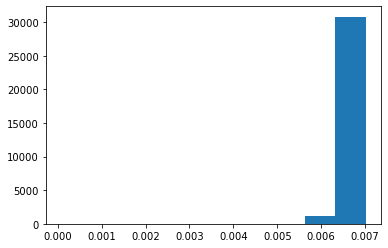

In [42]:
plt.hist(bg)


(array([32., 18., 18., 15., 11., 21.,  5.,  7.,  2.,  3.]),
 array([0.00640682, 0.00643399, 0.00646116, 0.00648833, 0.00651549,
        0.00654266, 0.00656983, 0.00659699, 0.00662416, 0.00665133,
        0.00667849], dtype=float32),
 <BarContainer object of 10 artists>)

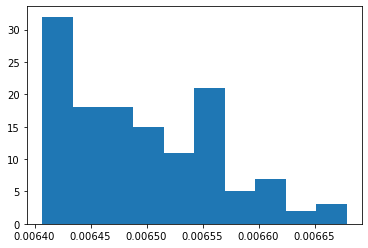

In [43]:
plt.hist(signal)